In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg  
  inflating: Final datateset for Image/validation/happy/16106.jpg  
  inflating: Final datateset for Image/validation/happy/16108.jpg  
  inflating: Final datateset for Image/validation/happy/16120.jpg  
  inflating: Final datateset for Image/validation/happy/16141.jpg  
  inflating: Final datateset for Image/validation/happy/16192.jpg  
  inflating: Final datateset for Image/validation/happy/16198.jpg  
  inflating: Final datateset for Image/validation/happy/16238.jpg  
  inflating: Final datateset for Image/validation/happy/16275.jpg  
  inflating: Final datateset for Image/validation/happy/1628.jpg 

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np

In [4]:
train_dir = '/content/Final datateset for Image/train'
validation_dir = '/content/Final datateset for Image/validation'

In [5]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode ='categorical',
                                                    subset='training')

Found 17514 images belonging to 13 classes.


In [6]:
test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=50,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [7]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [8]:
image_size = [224,224]

vgg= VGG16(input_shape=image_size+[3], weights = None, include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
x=Flatten()(vgg.output)
prediction=Dense(13, activation= 'softmax')(x)
model=Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history=model.fit(train_generator,epochs=25)

Epoch 1/25
351/351 [==============================] - 217s 575ms/step - loss: 1.8677 - accuracy: 0.2894
Epoch 2/25
351/351 [==============================] - 201s 572ms/step - loss: 1.7318 - accuracy: 0.3431
Epoch 3/25
351/351 [==============================] - 199s 565ms/step - loss: 1.6700 - accuracy: 0.3682
Epoch 4/25
351/351 [==============================] - 201s 572ms/step - loss: 1.6303 - accuracy: 0.3791
Epoch 5/25
351/351 [==============================] - 203s 577ms/step - loss: 1.6204 - accuracy: 0.3871
Epoch 6/25
351/351 [==============================] - 201s 573ms/step - loss: 1.5964 - accuracy: 0.3992
Epoch 7/25
351/351 [==============================] - 200s 570ms/step - loss: 1.5608 - accuracy: 0.4115
Epoch 8/25
351/351 [==============================] - 202s 575ms/step - loss: 1.5571 - accuracy: 0.4130
Epoch 9/25
351/351 [==============================] - 201s 572ms/step - loss: 1.5702 - accuracy: 0.4102
Epoch 10/25
351/351 [==============================] - 203s 578m

Accuracy:  0.47590500116348267


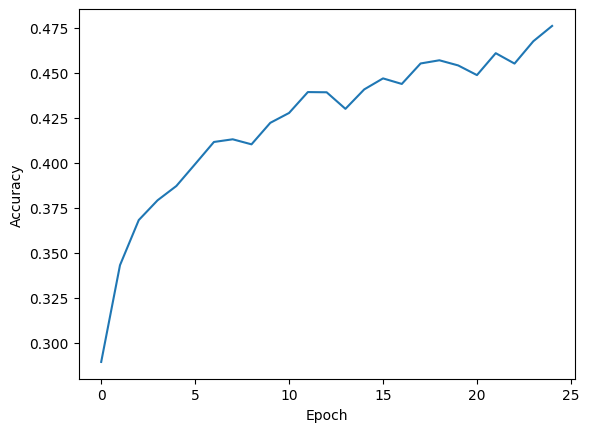

In [13]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [14]:
#Testing

from tensorflow.keras.preprocessing import image
import numpy as np

img_pred=image.load_img("/content/Final datateset for Image/validation/disgust/12417.jpg",target_size=(224,224))
img_pred = np.expand_dims(img_pred, axis=0)
rslt = model.predict(img_pred)

print(rslt)

1/1 [==============================] - 1s 826ms/step
[[1.59547180e-01 1.22376310e-03 1.99892092e-02 4.70659882e-02
  3.84499494e-04 5.30423586e-06 5.73218763e-01 1.65531776e-06
  2.38263072e-03 5.54791242e-02 5.89042432e-13 3.36099826e-02
  1.07091926e-01]]


In [15]:
if rslt[0][0]>rslt[0][1]:
  prediction = "angry"

else:
  prediction = "disgust"


print(prediction)

angry
